# Decay time experiment
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
from ROOT import *
import numpy as np

# For inline image display
from IPython.display import Image

Welcome to JupyROOT 6.24/04


### (1) ROOT settings

In [2]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(600)
gStyle.SetCanvasDefH(400)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.0,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


### (2) Define decay time experiment

In [3]:
def nDecTime(ndec,tmean):
    ttot = 0
    for idec in range(ndec) :
        t1 = np.random.exponential(tmean)
        ttot += t1        
    return ttot

### (3) Run multiple experiments

In [4]:
# Number of decay sequences to measure

Ntry = 1000

# Number of decays required in one sequence

Ndec =5

# Mean lifetime

tmean = 1.

# Histogram to collect results

Xmax=20.
Nbin = 20
dX=Xmax/Nbin
hexp = TH1D('hexp','Measured decay sequence time',Nbin, 0., Xmax)

# Main experiment loop

wexp = 1./Ntry/dX

for i in  range(Ntry):
    exp_data = nDecTime(Ndec,tmean)
    hexp.Fill(exp_data,wexp)

### (4) Plot results

Mean sequence time:  4.89528491423396


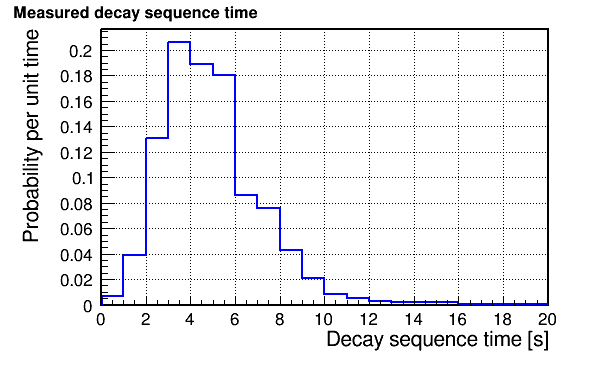

Info in <TCanvas::Print>: png file gamma.png has been created


In [5]:
# Log scale

gStyle.SetOptLogy(0)

# Create plot canvas

cexp = TCanvas('cexp')
   
# Axis description

hexp.GetXaxis().SetTitle("Decay sequence time [s]")
hexp.GetYaxis().SetTitle("Probability per unit time")

# No statistics

hexp.SetStats(0)

print('Mean sequence time: ',hexp.GetMean())

# Plot style

hexp.SetMarkerStyle(20)
hexp.DrawCopy('HIST')

cexp.Update()
cexp.Print('gamma.png')

Image(filename='gamma.png')